# Case 12 - Machine Learnig y K-Means

## Business Problem

Currently the company you are working for is having a talent retention problem. You have found it useful to understand this behavior and find the reason why people leave the company.

## 4.2. Definitions
### 4.2.1 Machine Learning
Machine learning is a class of computational algorithms that iteratively "learns" an approximation to some function. There are three components that make up a machine learning algorithm: representation, evaluation, and optimization.
**Representation** involves the transformation of inputs from one space to another more useful space that can be more easily interpreted.
The **evaluation** is essentially the loss function. How effectively did your algorithm transform your data into a more useful space?
**Optimization** is the last piece of the puzzle. Once you have the evaluation component, you can optimize the rendering function to improve your evaluation metric.

https://towardsdatascience.com/no-machine-learning-is-not-just-glorified-statistics-26d3952234e3

### 4.2.2 Pattern Recognition

Pattern recognition is the search for and identification of recurring patterns with roughly similar results.

https://towardsdatascience.com/comparing-coffee-using-pattern-recognition-35b92cca4502

https://towardsdatascience.com/technical-pattern-recognition-for-trading-in-python-63770aab422f

### 4.2.2 Data Mining

By collecting and inspecting data, people were able to discover some patterns. Even the entire data set is garbage, there are some hidden patterns that can be extracted by combining multiple data sources to provide valuable insights.

https://towardsdatascience.com/data-mining-in-brief-26483437f178

https://towardsdatascience.com/your-ultimate-data-mining-machine-learning-cheat-sheet-9fce3fa16

## Packages Import

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, OrdinalEncoder

## Data Import

The information was downloaded from a dataset available at [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). These data are tabular, and are in .csv format. Therefore they can be loaded as a table in python. This can be done via a pandas DataFrame.

In [2]:
df_HR = pd.read_csv('/work/indu5012_case_12/data/WA_Fn-UseC_-HR-Employee-Attrition (1).csv')
df_HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## EDA

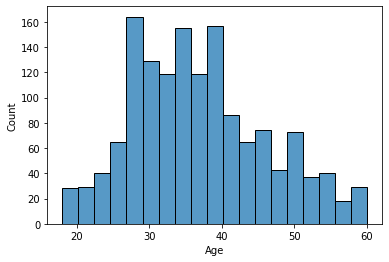

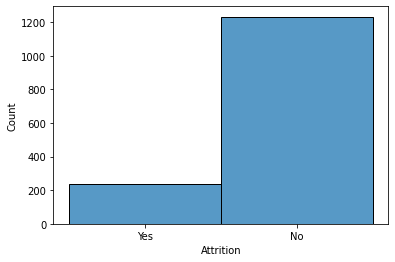

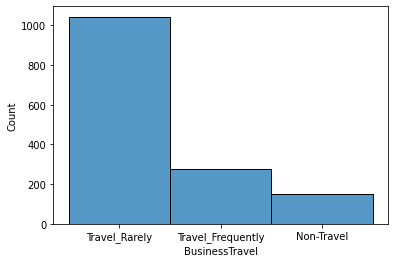

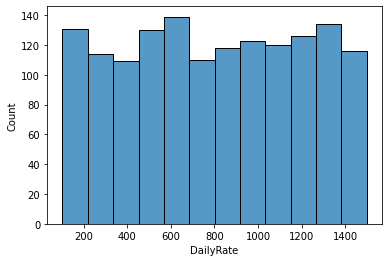

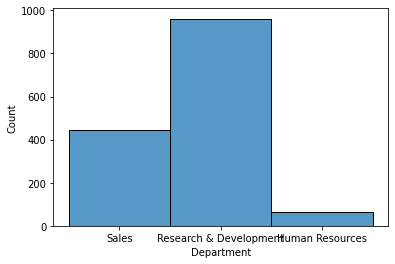

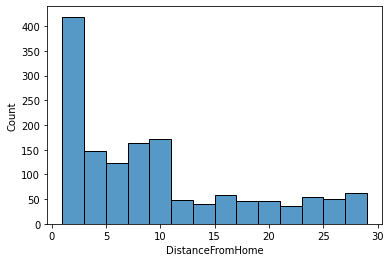

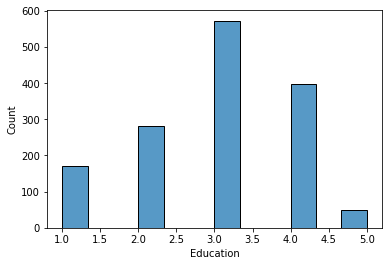

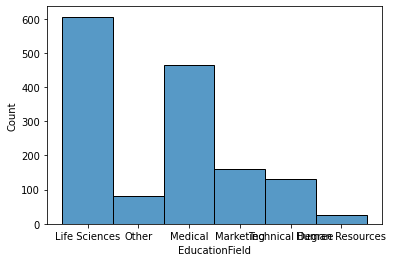

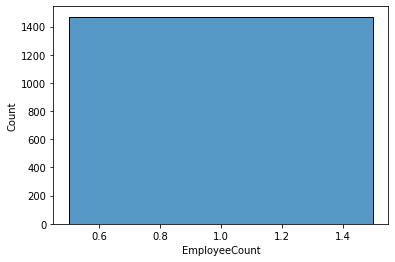

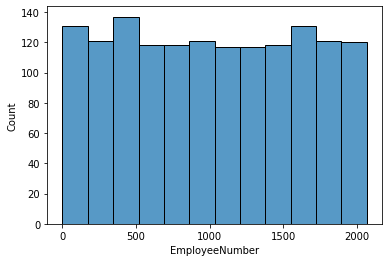

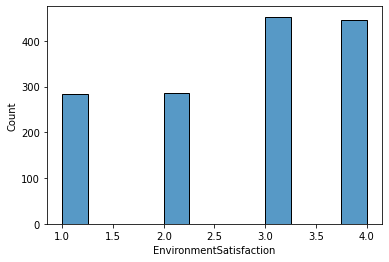

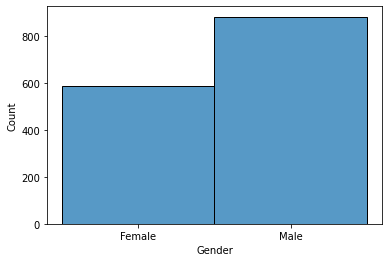

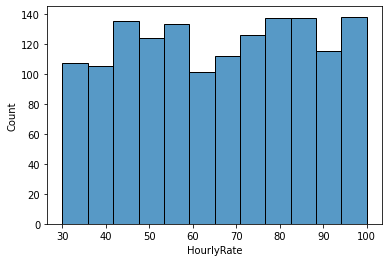

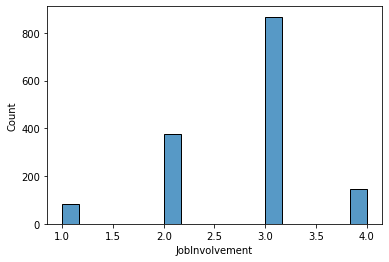

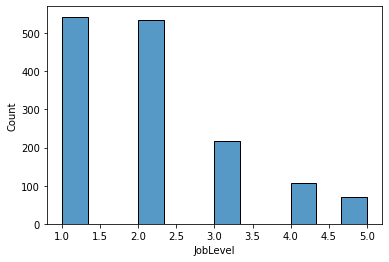

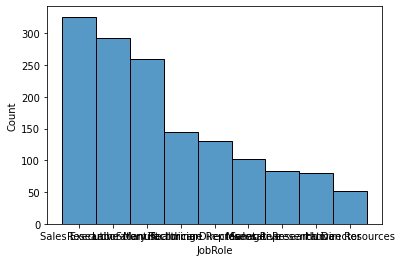

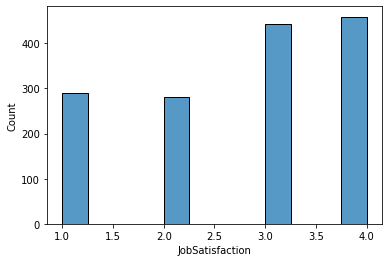

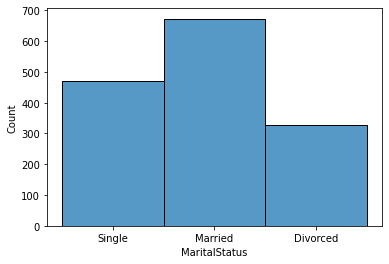

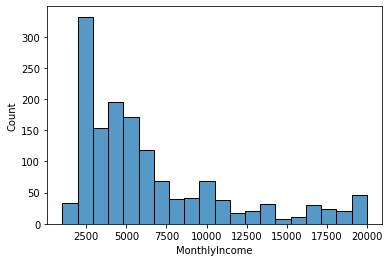

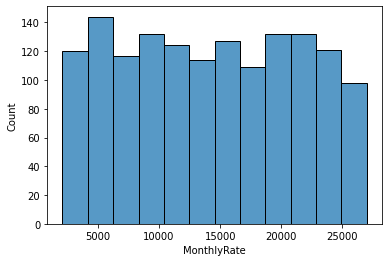

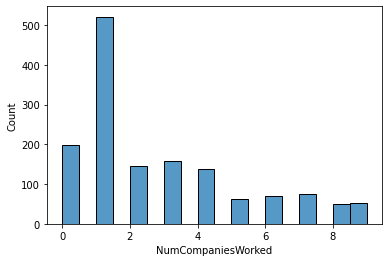

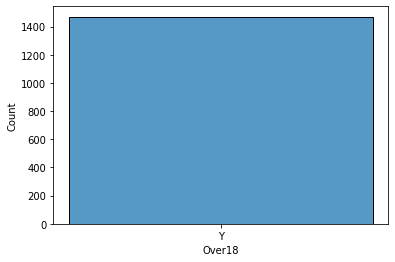

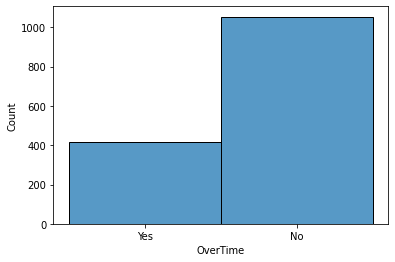

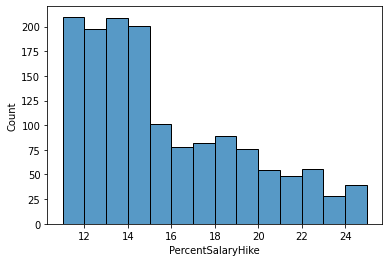

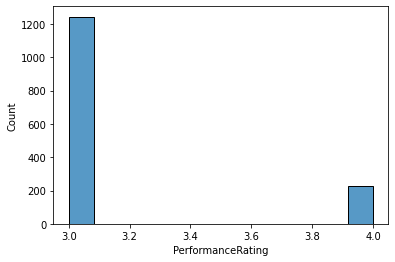

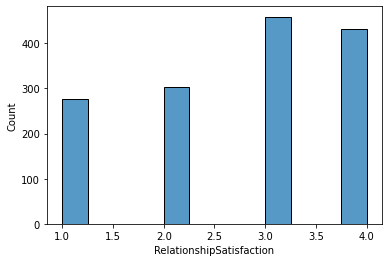

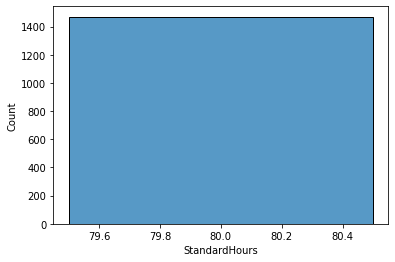

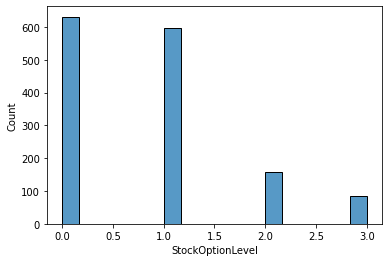

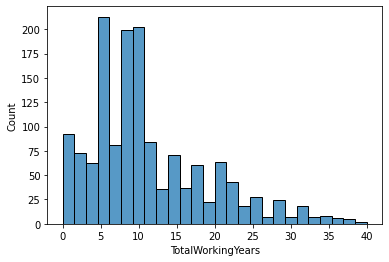

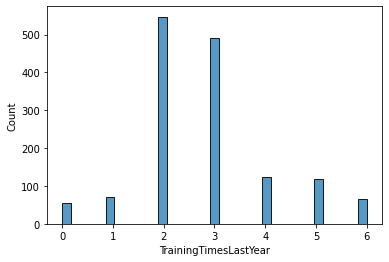

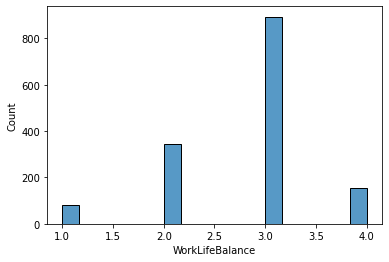

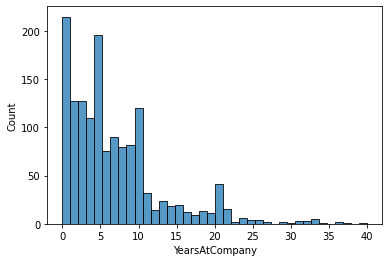

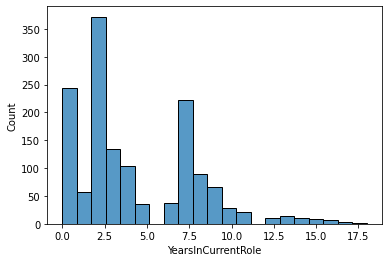

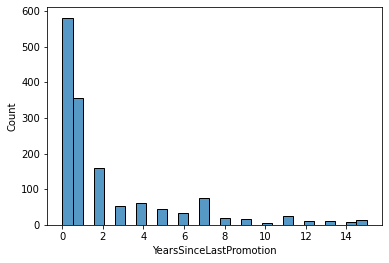

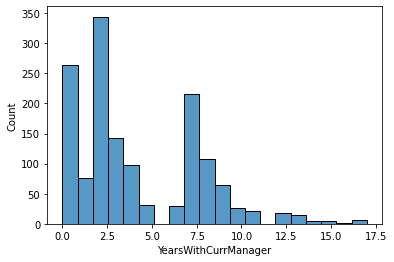

In [3]:
for column in df_HR.columns:
    sns.histplot(x= column,data = df_HR)
    plt.show()

## Data Cleaning and Transformation

In [4]:
df_HR.drop(columns = ['EmployeeCount','Over18','StandardHours'],inplace= True)
df_HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [5]:
df_HR_KMeans = df_HR.copy()

df_HR_KMeans['Attrition'].replace(['No','Yes',],[0, 1], inplace=True)
df_HR_KMeans = df_HR_KMeans[df_HR_KMeans['Attrition']== 0]
df_HR_KMeans.drop(columns=['Attrition'],inplace = True)
df_HR_KMeans['Education'].replace(['No','Yes',],[0, 1], inplace=True)
df_HR_KMeans['BusinessTravel'].replace([ 'Non-Travel','Travel_Rarely', 'Travel_Frequently'],[0, 1,2], inplace=True)
df_HR_KMeans['Gender'].replace(['Female', 'Male'],[0, 1], inplace=True)
df_HR_KMeans['OverTime'].replace(['Yes', 'No'],[1, 0], inplace=True)

In [6]:
df_HR_dummies = pd.get_dummies(df_HR_KMeans[['Department','EducationField','JobRole','MaritalStatus']])
df_HR_KMeans = pd.concat([df_HR_KMeans,df_HR_dummies],axis=1)
df_HR_KMeans.drop(columns = ['Department','EducationField','JobRole','MaritalStatus'],inplace=True)


for column in df_HR_KMeans.columns:
    scaler = MinMaxScaler()
    df_HR_KMeans[column] = scaler.fit_transform(df_HR_KMeans[column].values.reshape(-1,1))
df_HR_KMeans.head(5)

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1,0.738095,1.0,0.126700,0.250000,0.00,0.000000,0.666667,1.0,0.442857,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.357143,1.0,0.923407,0.071429,0.75,0.001452,1.000000,0.0,0.371429,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.5,0.350036,0.035714,0.00,0.002420,0.000000,1.0,0.142857,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.333333,1.0,0.646385,0.035714,0.25,0.002904,1.000000,1.0,0.700000,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.976190,0.5,0.874732,0.071429,0.50,0.003872,0.666667,0.0,0.728571,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Machine Learning

### Unsupervised Learning

It is used when we want to learn the inherent structure of our data without using explicitly provided labels. It is very useful in exploratory analysis because it can automatically identify the structure of the data.

<figure>
<img src="/work/indu5012_case_12/fig/unsupervised_learning.png" align="center"/> 
</figure> 


https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d

### Clustering Algorithms

The goal of K-means is simple: to group similar data points together and discover underlying patterns. To achieve this goal, K-means searches for a fixed number (k) of clusters in a dataset.

<figure>
<img src="/work/indu5012_case_12/fig/KMeans Example.png" align="center"/> 
</figure> 

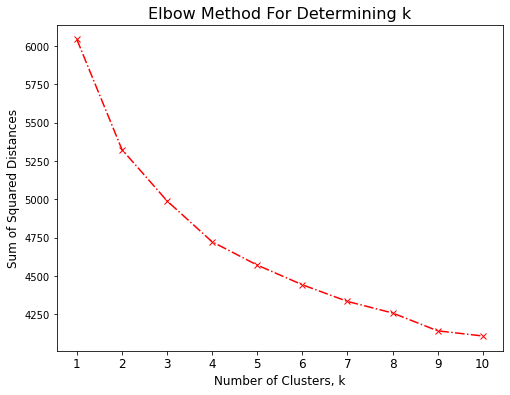

In [7]:
sum_sq_d = []
K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_HR_KMeans)
    sum_sq_d.append(km.inertia_)
    
plt.figure(figsize=(8,6))

plt.plot(K, sum_sq_d, 'rx-.')

plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)

plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Elbow Method For Determining k', fontsize=16)

plt.show()

In [8]:
k = 2

kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(df_HR_KMeans)
labels = kmeans.predict(df_HR_KMeans)

df_HR_KMeans['labels']=labels

df_HR_KMeans_grouped = df_HR_KMeans.groupby(['labels']).mean()
df_HR_KMeans_grouped['label'] = [0,1]
df_HR_KMeans_grouped.head(5)

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,label
labels,,,,,,,,,,,,,,,,,,,,,
0,0.455609,0.518362,0.51024,0.285412,0.490113,0.498927,0.578154,0.573446,0.512712,0.587571,...,0.098870,0.000000,0.000000,0.000000,0.759887,0.141243,0.217514,0.500000,0.282486,0
1,0.469825,0.532423,0.50793,0.281611,0.478385,0.495446,0.595374,0.601820,0.513961,0.591202,...,0.070535,0.153584,0.088737,0.278726,0.000000,0.000000,0.246871,0.468714,0.284414,1


<AxesSubplot:ylabel='labels'>

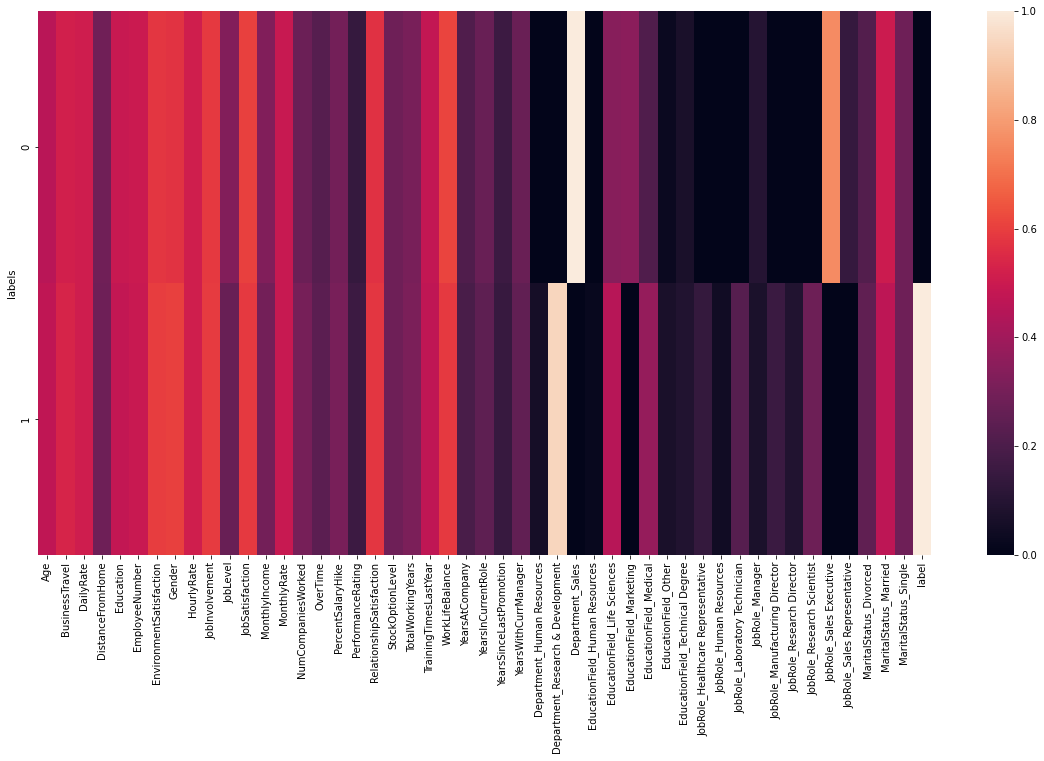

In [9]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df_HR_KMeans_grouped)

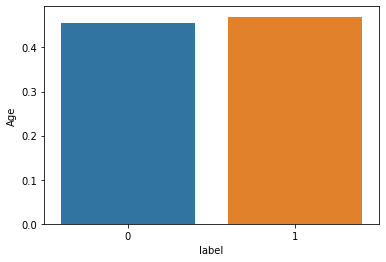

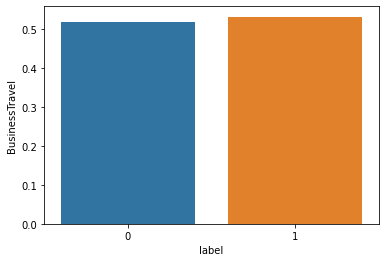

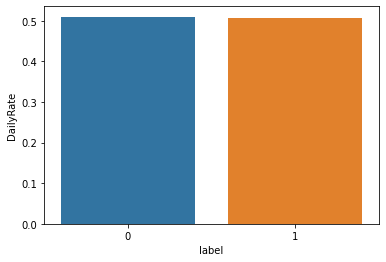

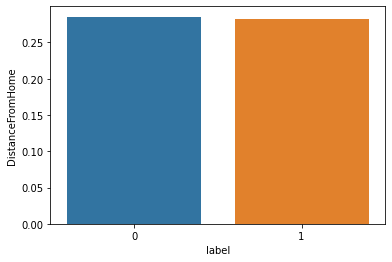

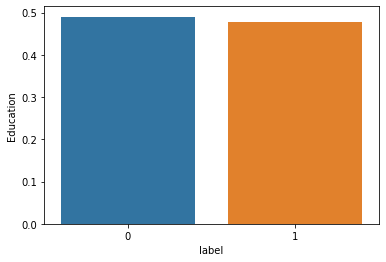

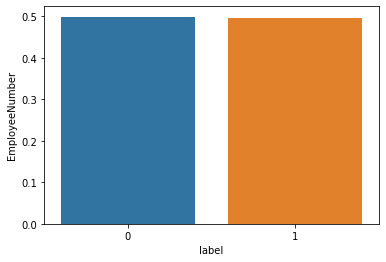

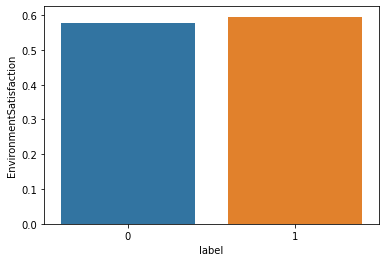

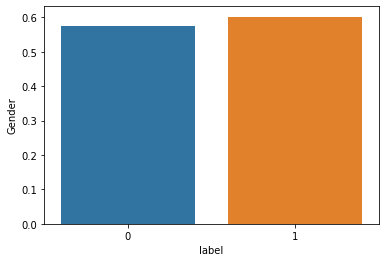

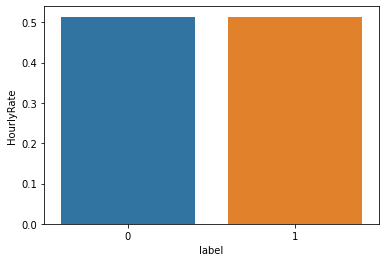

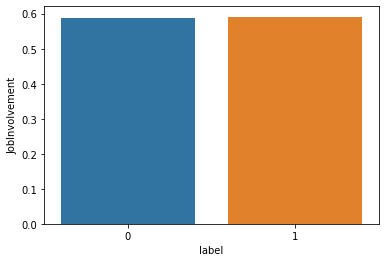

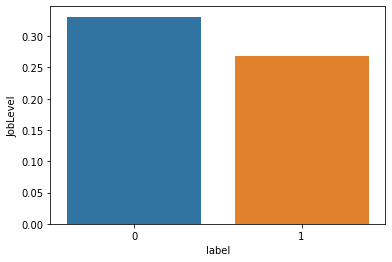

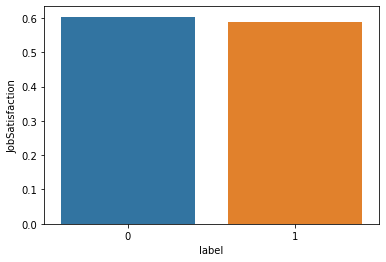

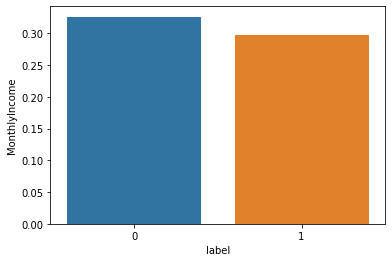

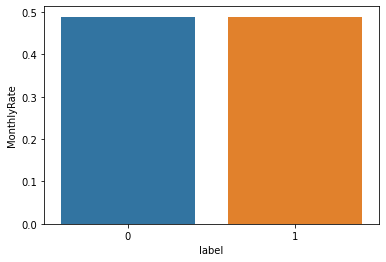

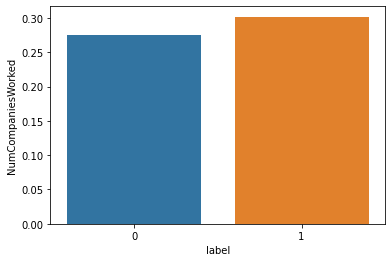

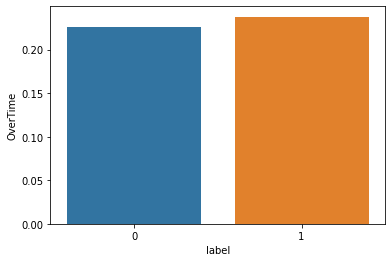

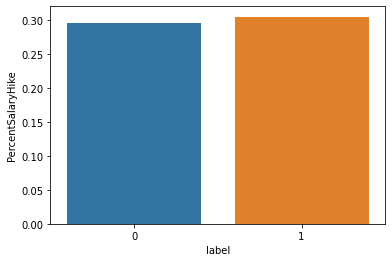

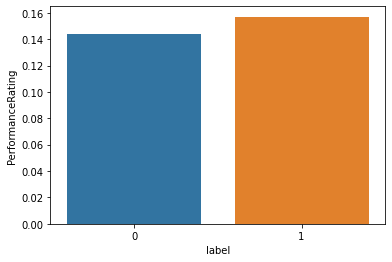

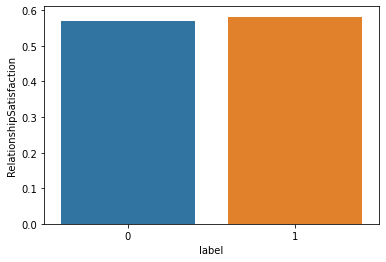

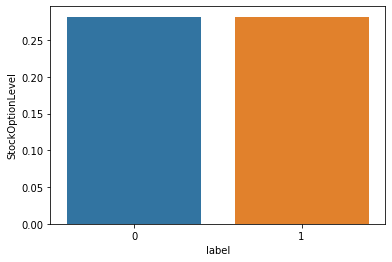

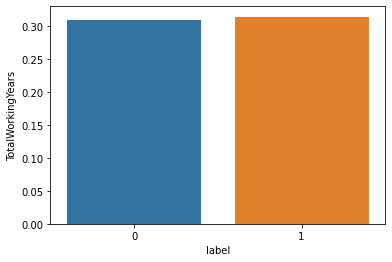

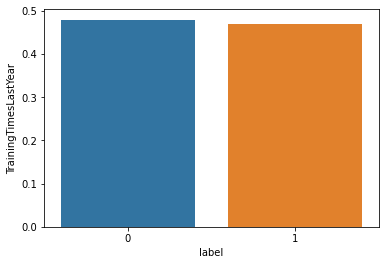

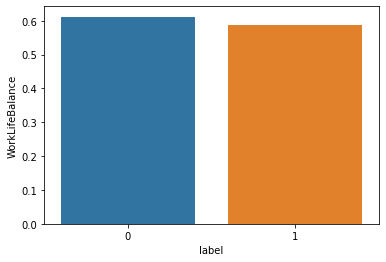

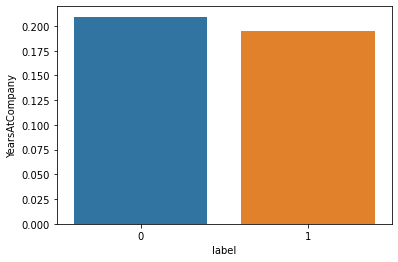

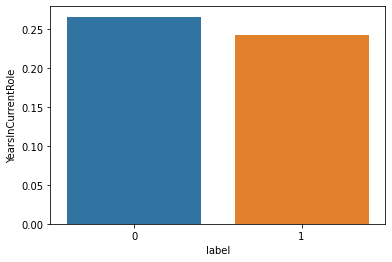

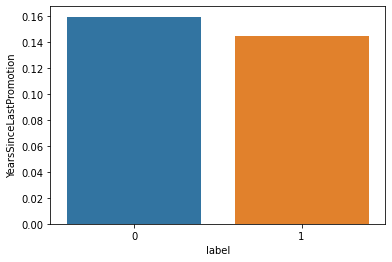

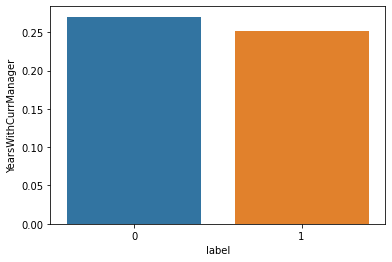

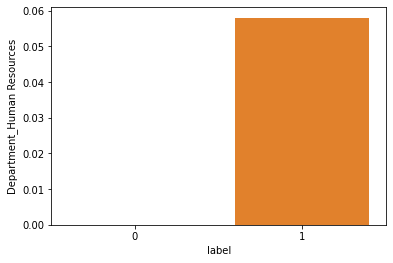

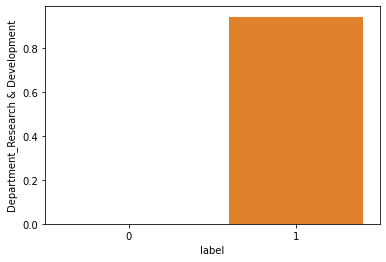

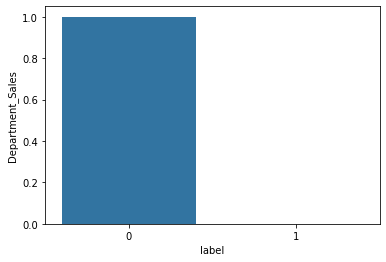

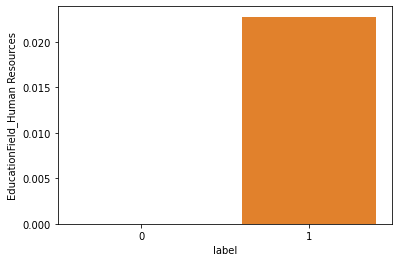

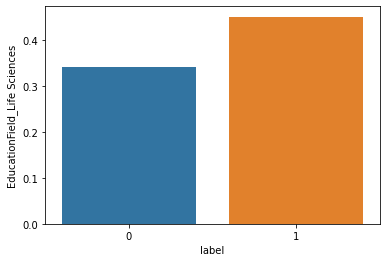

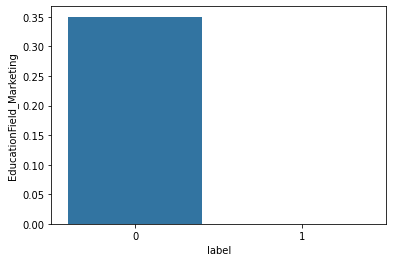

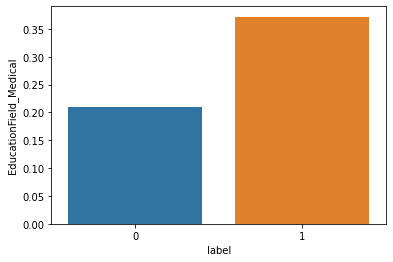

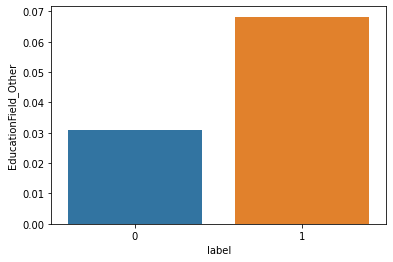

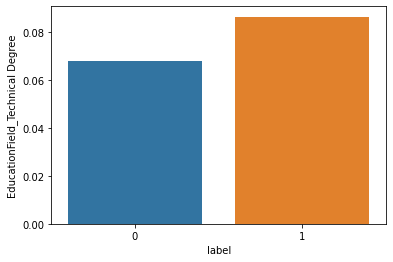

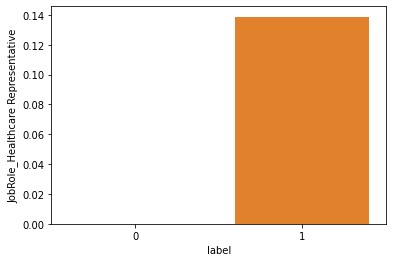

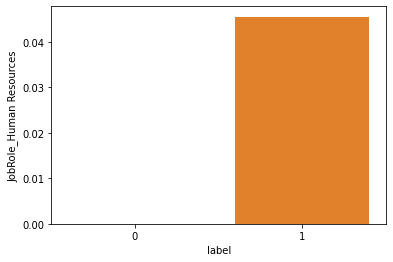

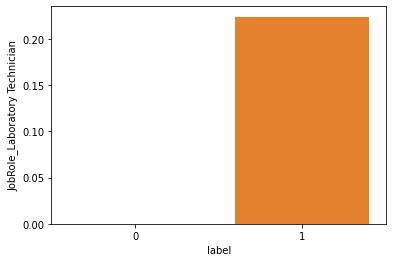

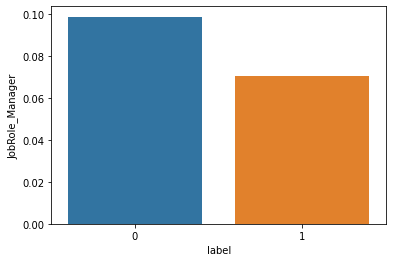

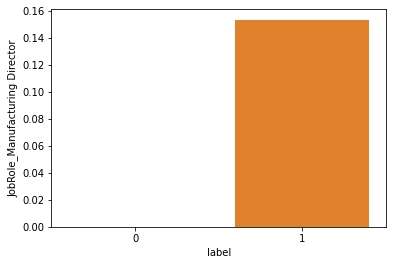

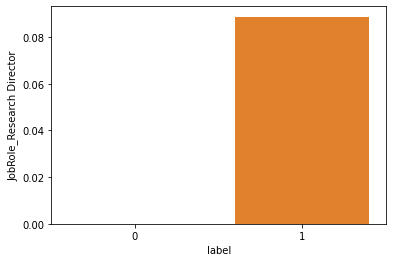

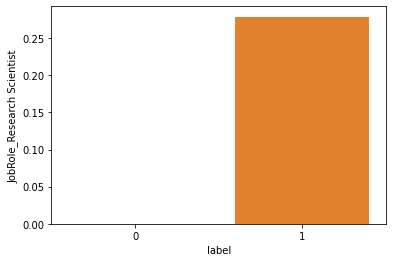

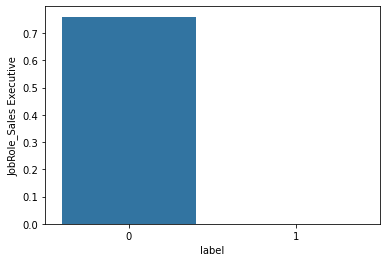

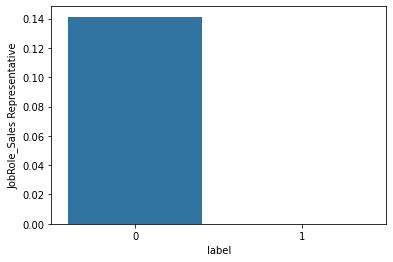

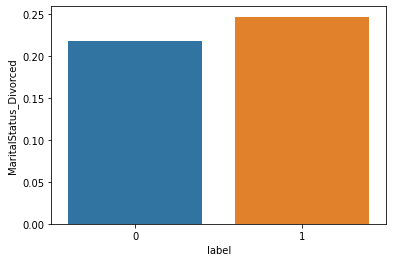

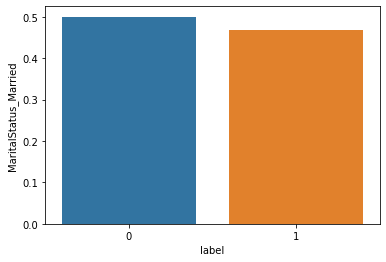

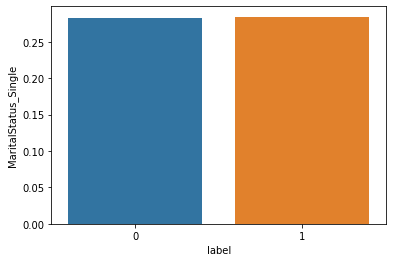

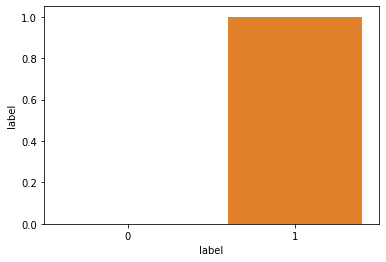

In [11]:
for column in df_HR_KMeans_grouped.columns:
    sns.barplot(x = 'label', y = column ,data = df_HR_KMeans_grouped) 
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>